<a href="https://colab.research.google.com/github/jagadeesh01032005/MARINE-IMAGE-CLAASIFICATION/blob/main/underwater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/archive/aquarium_pretrain"

print("=== Printing Dataset Structure ===\n")
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Folder: {root}")
    for file in files:
        print(f"   📄 {file}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Printing Dataset Structure ===

📂 Folder: /content/drive/MyDrive/archive/aquarium_pretrain
   📄 README.roboflow.txt
   📄 README.dataset.txt
   📄 data.yaml
📂 Folder: /content/drive/MyDrive/archive/aquarium_pretrain/valid
📂 Folder: /content/drive/MyDrive/archive/aquarium_pretrain/valid/labels
   📄 IMG_8465_jpg.rf.4e9f92133e269119a82e502339b7981e.txt
   📄 IMG_8489_jpg.rf.e79ed773754ce88ed4a9a9042d98dca9.txt
   📄 IMG_2345_jpeg_jpg.rf.1c32346981ba9d501078eb82f2c63555.txt
   📄 IMG_2325_jpeg_jpg.rf.a8ebf587a5ae7d2f8c58f977583e344c.txt
   📄 IMG_2353_jpeg_jpg.rf.6f07383174c9ac1c07641f16ee637f33.txt
   📄 IMG_8535_MOV-0_jpg.rf.bb8a782b58745c0c8a6b334ab75a6b4c.txt
   📄 IMG_2277_jpeg_jpg.rf.86c72d6192da48d941ffa957f4780665.txt
   📄 IMG_8530_jpg.rf.a4abb3dc30e6984d6dd52f96b9f654f9.txt
   📄 IMG_2607_jpeg_jpg.rf.f969243b3db0c2242280e1aad0f4a0b8.txt
   📄 IMG_2555_jpeg_jpg

NORMALIZATION Model for preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your dataset
dataset_path = "/content/drive/MyDrive/archive/aquarium_pretrain"

# Normalization (Scaling pixel values to [0,1])
datagen = ImageDataGenerator(
    rescale=1./255,         # <-- Normalization step
    validation_split=0.2    # Split into training and validation (80/20)
)

# Training data loader
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),    # Resize images
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Validation data loader
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

print("Normalization applied successfully.")


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
Normalization applied successfully.


CNN TRAINING

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# ✅ Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Prevents overfitting
    layers.Dense(train_data.num_classes, activation='softmax')
])

# ✅ Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train model
history = model.fit(
    train_data,
    epochs=10,               # you can change number of epochs
    validation_data=val_data
)

# ✅ Save the model
model.save("/content/drive/MyDrive/aquarium_cnn_model.h5")

print("🎉 Training completed and model saved successfully!")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 227s 14s/step - accuracy: 0.5349 - loss: 2.1865 - val_accuracy: 0.7063 - val_loss: 0.7841
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.6997 - loss: 0.8416 - val_accuracy: 0.7063 - val_loss: 0.8362
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.7259 - loss: 0.8133 - val_accuracy: 0.7063 - val_loss: 0.7845
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 5s/step - accuracy: 0.6913 - loss: 0.8617 - val_accuracy: 0.7063 - val_loss: 0.8245
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.7079 - loss: 0.7897 - val_accuracy: 0.7063 - val_loss: 0.7818
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.7141 - loss: 0.7746 - val_accuracy: 0.7063 - val_loss: 0.8363
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.6987 - loss: 0.7751 - val_accuracy: 0.7063 - val_loss: 0.8076
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.7250 - loss: 0.6939 - val_accuracy: 0.7063 - val_los

🎉 Training completed and model saved successfully!


KNN

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Path to dataset
DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# Load dataset
labels = []
images = []

# Iterate through 'train', 'valid', 'test' folders
for split_folder in os.listdir(DATASET_PATH):
    split_path = os.path.join(DATASET_PATH, split_folder)

    if not os.path.isdir(split_path) or split_folder in ['README.roboflow.txt', 'README.dataset.txt', 'data.yaml']:
        continue

    # Navigate into the 'images' subfolder within each split
    images_folder_path = os.path.join(split_path, 'images')

    if not os.path.isdir(images_folder_path):
        continue

    for image_name in os.listdir(images_folder_path):
        image_path = os.path.join(images_folder_path, image_name)

        img = cv2.imread(image_path)
        if img is None:
            continue

        img = cv2.resize(img, (64, 64))  # resize to reduce complexity
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img.flatten())  # flatten the image to 1D (KNN requires this)
        # Use the parent folder name (e.g., 'train', 'valid', 'test') as the label
        labels.append(split_folder)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Total images loaded:", len(images))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
print("\nKNN Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Total images loaded: 638

KNN Classification Report:

              precision    recall  f1-score   support

        test       0.00      0.00      0.00        13
       train       0.70      0.97      0.81        90
       valid       0.00      0.00      0.00        25

    accuracy                           0.68       128
   macro avg       0.23      0.32      0.27       128
weighted avg       0.49      0.68      0.57       128


Accuracy: 0.6796875


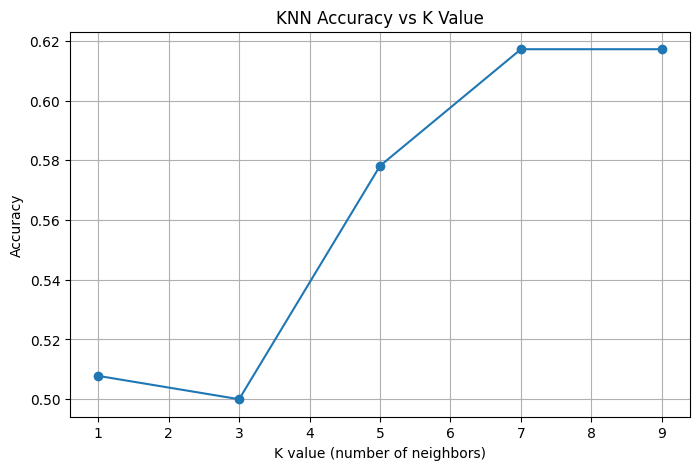

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ✅ Path to dataset
DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# ✅ Load images & labels
images = []
labels = []

# Iterate through 'train', 'valid', 'test' folders
for split_folder in os.listdir(DATASET_PATH):
    split_path = os.path.join(DATASET_PATH, split_folder)

    if not os.path.isdir(split_path) or split_folder in ['README.roboflow.txt', 'README.dataset.txt', 'data.yaml']:
        continue

    # Navigate into the 'images' subfolder within each split
    images_folder_path = os.path.join(split_path, 'images')

    if not os.path.isdir(images_folder_path):
        continue

    for image_name in os.listdir(images_folder_path):
        image_path = os.path.join(images_folder_path, image_name)

        img = cv2.imread(image_path)
        if img is None:
            continue

        img = cv2.resize(img, (64, 64))     # resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img.flatten())        # flatten for KNN
        labels.append(split_folder)

images = np.array(images)
labels = np.array(labels)

# ✅ Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# ✅ Try different values of K
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred))

# ✅ Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')   # plot without specifying colors
plt.xlabel("K value (number of neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.grid()
plt.show()

<Figure size 800x600 with 0 Axes>

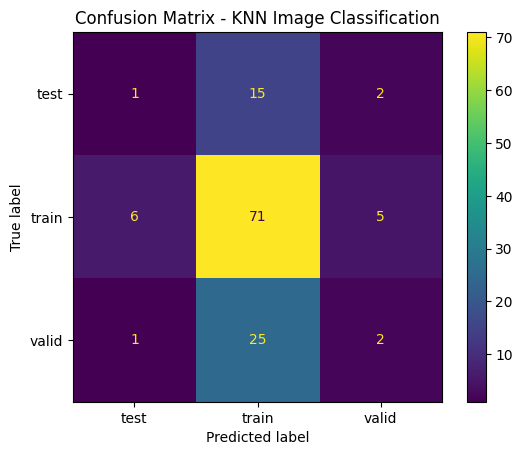

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Path to dataset
DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# ✅ Load images & labels
images = []
labels = []

for split_folder in os.listdir(DATASET_PATH):
    split_path = os.path.join(DATASET_PATH, split_folder)

    if not os.path.isdir(split_path) or split_folder in ['README.roboflow.txt', 'README.dataset.txt', 'data.yaml']:
        continue

    # Navigate into the 'images' subfolder within each split
    images_folder_path = os.path.join(split_path, 'images')

    if not os.path.isdir(images_folder_path):
        continue

    for image_name in os.listdir(images_folder_path):
        image_path = os.path.join(images_folder_path, image_name)

        img = cv2.imread(image_path)
        if img is None:
            continue

        img = cv2.resize(img, (64, 64))         # resize images
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img.flatten())            # flatten the image
        labels.append(split_folder)

images = np.array(images)
labels = np.array(labels)

# ✅ Split data
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# ✅ Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# ✅ Predict
y_pred = knn.predict(X_test)

# ✅ Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))

plt.figure(figsize=(8,6))
disp.plot()
plt.title("Confusion Matrix - KNN Image Classification")
plt.show()

ResNet (Residual Network)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# ✅ Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.20,    # 80% Train / 20% Test
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),   # ResNet input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Load ResNet50 (without top/classifier layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers (transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# ✅ Add Custom Layers for Your Dataset
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# ✅ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train Model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

# ✅ Save Model
model.save("resnet_aquarium_model.h5")
print("✅ Model training completed and saved as resnet_aquarium_model.h5")


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 9s/step - accuracy: 0.5804 - loss: 0.9360 - val_accuracy: 0.7063 - val_loss: 0.8306
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.6501 - loss: 0.8809 - val_accuracy: 0.7063 - val_loss: 1.0527
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 147s 9s/step - accuracy: 0.6006 - loss: 1.0495 - val_accuracy: 0.7063 - val_loss: 0.9987
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 10s/step - accuracy: 0.6795 - loss: 0.9657 - val_accuracy: 0.7063 - val_loss: 0.8290
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.7019 - loss: 0.8211 - val_accuracy: 0.7063 - val_loss: 0.8274
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 8s/step - accuracy: 0.6799 - loss: 0.8633 - val_accuracy: 0.7063 - val_loss: 0.8085
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.7306 - loss: 0.7479 - val_accuracy: 0.7063 - val_loss: 0.7944
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 149s 10s/step - accuracy: 0.6917 - loss: 0.8207 - val_accuracy: 0.7063 -

✅ Model training completed and saved as resnet_aquarium_model.h5


Inception Networks (GoogLeNet /      Inception-v3/v4)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ✅ Dataset Path
DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# ✅ Image Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.20,     # 80% training / 20% validation
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(299, 299),   # InceptionV3 input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Load InceptionV3 without classifier (transfer learning)
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(299, 299, 3))

# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

# ✅ Custom Classification Head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# ✅ Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train Model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

# ✅ Save Model
model.save("inception_aquarium_model.h5")
print("✅ Model saved as inception_aquarium_model.h5")


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 200s 12s/step - accuracy: 0.5366 - loss: 1.2761 - val_accuracy: 0.7063 - val_loss: 0.8187
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 12s/step - accuracy: 0.7182 - loss: 0.8093 - val_accuracy: 0.7063 - val_loss: 0.8364
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 183s 12s/step - accuracy: 0.7006 - loss: 0.8204 - val_accuracy: 0.7063 - val_loss: 0.8173
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 189s 12s/step - accuracy: 0.6885 - loss: 0.8083 - val_accuracy: 0.7063 - val_loss: 0.8232
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 12s/step - accuracy: 0.6897 - loss: 0.7832 - val_accuracy: 0.7063 - val_loss: 0.8282
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 12s/step - accuracy: 0.7049 - loss: 0.7507 - val_accuracy: 0.6429 - val_loss: 0.8454
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 186s 12s/step - accuracy: 0.7112 - loss: 0.7315 - val_accurac

✅ Model saved as inception_aquarium_model.h5


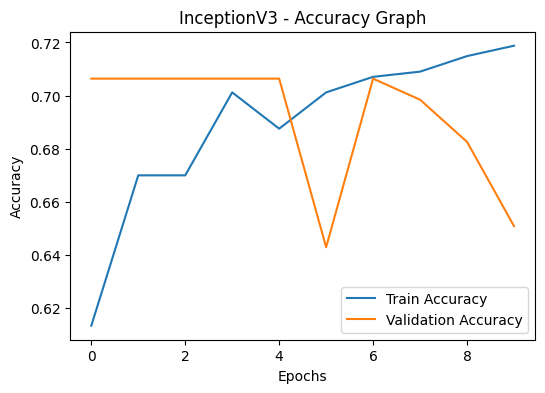

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("InceptionV3 - Accuracy Graph")
plt.legend()
plt.show()


DenseNet-121

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ✅ Dataset path
DATASET_PATH = "/content/drive/MyDrive/archive/aquarium_pretrain"

# ✅ Image preprocessing & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,       # 80% train / 20% validation
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),      # DenseNet input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_data = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ✅ Load DenseNet121 without top classifier
base_model = DenseNet121(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# ✅ Freeze pretrained layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# ✅ Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.4)(x)
output_layer = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# ✅ Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train model
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)

# ✅ Save final model
model.save("densenet121_aquarium_model.h5")
print("✅ Model training completed and saved as densenet121_aquarium_model.h5")


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 163s 9s/step - accuracy: 0.5896 - loss: 1.2071 - val_accuracy: 0.7063 - val_loss: 0.9635
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 133s 8s/step - accuracy: 0.6877 - loss: 0.8702 - val_accuracy: 0.6111 - val_loss: 0.9785
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 131s 8s/step - accuracy: 0.6538 - loss: 0.8338 - val_accuracy: 0.7063 - val_loss: 0.8526
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 132s 8s/step - accuracy: 0.6801 - loss: 0.7841 - val_accuracy: 0.7063 - val_loss: 0.8537
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 136s 9s/step - accuracy: 0.7026 - loss: 0.7191 - val_accuracy: 0.6984 - val_loss: 0.8903
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 138s 9s/step - accuracy: 0.6954 - loss: 0.7726 - val_accuracy: 0.6984 - val_loss: 0.8703
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 150s 9s/step - accuracy: 0.7097 - loss: 0.7065 - val_accuracy: 0.70

✅ Model training completed and saved as densenet121_aquarium_model.h5


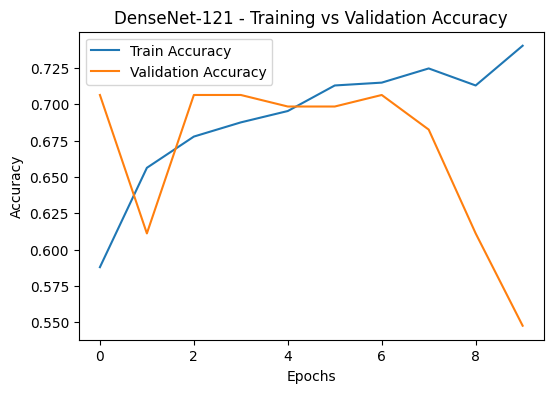

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("DenseNet-121 - Training vs Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Load pre-trained model without top layer
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False  # Freeze base layers for transfer learning

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')     # change depending on number of classes
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 10, 10, 1536)   │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,179,577 (42.65 MB)

 Trainable params: 396,042 (1.51 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

EfficientNet-B3

Using device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth


100%|██████████| 47.2M/47.2M [00:00<00:00, 171MB/s]


Epoch [1/5], Loss: 1.6957, Accuracy: 36.02%
Epoch [2/5], Loss: 1.3143, Accuracy: 57.05%
Epoch [3/5], Loss: 1.1259, Accuracy: 61.07%
Epoch [4/5], Loss: 0.9668, Accuracy: 73.15%
Epoch [5/5], Loss: 0.8620, Accuracy: 74.27%

✅ Validation Accuracy: 76.38%


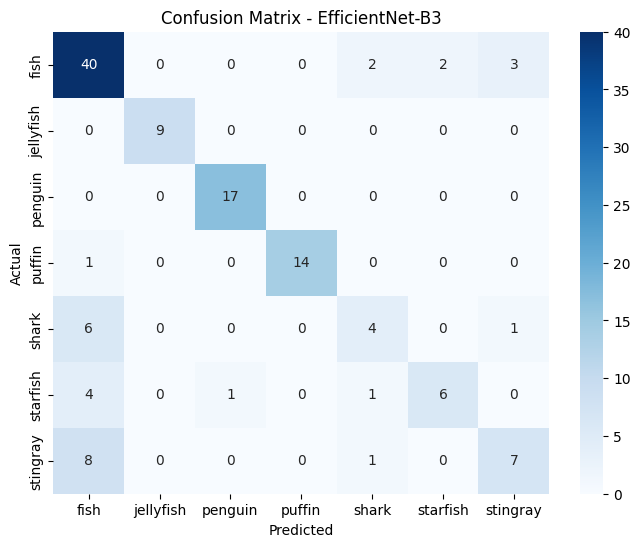

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import torch.optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml
from PIL import Image

# ===============================
# 1. Device setup
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ===============================
# 2. Custom Dataset Class
# ===============================
class AquariumDataset(Dataset):
    def __init__(self, root_dir, split, class_names, transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.class_names = class_names
        self.img_paths = []
        self.labels = []

        images_dir = os.path.join(root_dir, split, 'images')
        labels_dir = os.path.join(root_dir, split, 'labels')

        # Ensure the directories exist
        if not os.path.isdir(images_dir):
            raise FileNotFoundError(f"Images directory not found: {images_dir}")
        if not os.path.isdir(labels_dir):
            print(f"Warning: Labels directory not found for {split}, proceeding without labels for this split if not required.")

        for img_name in os.listdir(images_dir):
            if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                img_path = os.path.join(images_dir, img_name)
                # Assume label file has same base name but with .txt extension
                label_name = os.path.splitext(img_name)[0] + '.txt'
                label_path = os.path.join(labels_dir, label_name)

                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        # Assuming single object per image and taking the first class ID
                        # YOLO format: class_id x_center y_center width height
                        line = f.readline().strip()
                        if line:
                            try:
                                class_id = int(line.split(' ')[0])
                                self.img_paths.append(img_path)
                                self.labels.append(class_id)
                            except ValueError:
                                print(f"Could not parse class_id from label file: {label_path}")
                        else:
                            print(f"Warning: Label file {label_path} is empty.")
                else:
                    print(f"Warning: No label file found for {img_name} at {label_path}")

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


# ===============================
# 3. Data Preprocessing
# ===============================
data_dir = "/content/drive/MyDrive/archive/aquarium_pretrain"

# Load class names from data.yaml
data_yaml_path = os.path.join(data_dir, 'data.yaml')
with open(data_yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)
    class_names = data_yaml['names']
    num_classes = len(class_names)

train_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = AquariumDataset(root_dir=data_dir, split="train", class_names=class_names, transform=train_transforms)
val_dataset = AquariumDataset(root_dir=data_dir, split="valid", class_names=class_names, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# ===============================
# 4. Load EfficientNet-B3 Model
# ===============================
model = models.efficientnet_b3(pretrained=True)

# Freeze base layers (optional for fine-tuning)
for param in model.features.parameters():
    param.requires_grad = False

# Modify final classifier layer
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, num_classes)

model = model.to(device)

# ===============================
# 5. Define Loss & Optimizer
# ===============================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===============================
# 6. Training Loop
# ===============================
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")

# ===============================
# 7. Testing & Evaluation
# ===============================
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in val_loader:  # Use val_loader for evaluation
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

acc = accuracy_score(y_true, y_pred)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# ===============================
# 8. Confusion Matrix
# ===============================
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, # Use class_names for labels
            yticklabels=class_names) # Use class_names for labels
plt.title('Confusion Matrix - EfficientNet-B3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Perturbation-Based Explanation Model

Actual label: train


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Applying RISE masks: 100%|██████████| 300/300 [01:14<00:00,  4.00it/s]


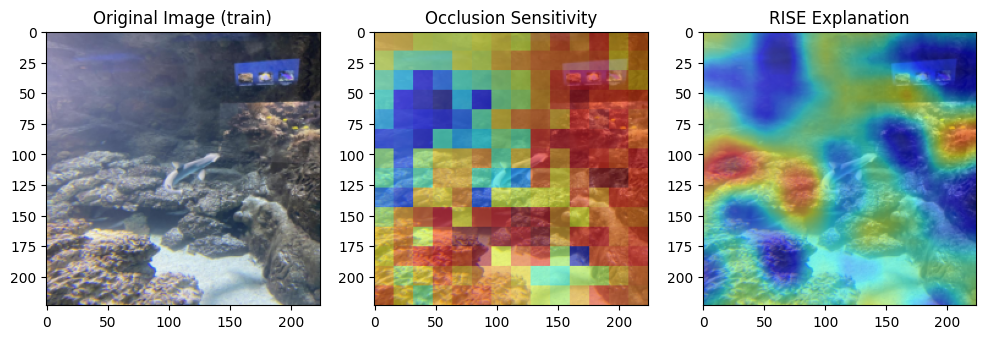

In [ ]:
# ===========================================
# 📦 IMPORT LIBRARIES
# ===========================================
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from tqdm import tqdm

# ===========================================
# 🔧 LOAD AND PREPROCESS AQUARIUM DATASET
# ===========================================
data_dir = '/content/drive/MyDrive/archive/aquarium_pretrain'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Get one random image for explanation
image, label = next(iter(dataloader))
class_names = dataset.classes
print(f"Actual label: {class_names[label[0]]}")

# ===========================================
# 🧠 LOAD PRETRAINED MODEL (ResNet50)
# ===========================================
model = models.resnet50(pretrained=True)
model.eval()

# ===========================================
# 🧩 FUNCTION: Occlusion Sensitivity Map
# ===========================================
def occlusion_sensitivity(model, image, patch_size=32, stride=16):
    _, _, H, W = image.shape
    baseline_output = torch.nn.functional.softmax(model(image), dim=1)
    baseline_conf = baseline_output.max().item()
    heatmap = np.zeros((H, W))

    for y in range(0, H, stride):
        for x in range(0, W, stride):
            occluded = image.clone()
            occluded[:, :, y:y+patch_size, x:x+patch_size] = 0  # Mask region
            with torch.no_grad():
                out = torch.nn.functional.softmax(model(occluded), dim=1)
            drop = baseline_conf - out.max().item()
            heatmap[y:y+patch_size, x:x+patch_size] = drop

    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
    return heatmap

# ===========================================
# 📊 FUNCTION: RISE Explanation
# ===========================================
def generate_masks(n_masks, s, p1):
    cell_size = np.ceil(np.array([224, 224]) / s)
    up_size = (int((s + 1) * cell_size[0]), int((s + 1) * cell_size[1]))
    masks = np.empty((n_masks, 224, 224))

    for i in range(n_masks):
        grid = np.random.rand(s, s) < p1
        grid = grid.astype('float32')
        mask = cv2.resize(grid, up_size)
        x, y = random.randint(0, int(cell_size[0])), random.randint(0, int(cell_size[1])) # Cast to int
        mask = mask[x:x+224, y:y+224]
        masks[i, :, :] = mask

    return masks

def rise(model, image, n_masks=300, s=8, p1=0.5):
    masks = generate_masks(n_masks, s, p1)
    preds = []

    with torch.no_grad():
        for mask in tqdm(masks, desc="Applying RISE masks"):
            masked = image * torch.tensor(mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
            pred = torch.nn.functional.softmax(model(masked), dim=1)
            preds.append(pred.cpu().numpy())

    preds = np.concatenate(preds, axis=0)
    scores = preds.mean(axis=0)
    class_idx = np.argmax(scores)

    saliency = np.zeros((224, 224))
    for i in range(n_masks):
        saliency += masks[i] * preds[i, class_idx]
    saliency /= saliency.max()
    return saliency, class_idx

# ===========================================
# 🎨 GENERATE EXPLANATIONS
# ===========================================
occlusion_map = occlusion_sensitivity(model, image)
rise_map, pred_idx = rise(model, image)
pred_label = class_names[label[0]] if label[0] < len(class_names) else f"Class {pred_idx}"

# Convert tensor image to numpy
img_np = np.transpose(image[0].numpy(), (1, 2, 0))

# ===========================================
# 📈 VISUALIZE RESULTS
# ===========================================
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_np)
plt.title(f"Original Image ({pred_label})")

plt.subplot(1, 3, 2)
plt.imshow(img_np)
plt.imshow(occlusion_map, cmap='jet', alpha=0.5)
plt.title("Occlusion Sensitivity")

plt.subplot(1, 3, 3)
plt.imshow(img_np)
plt.imshow(rise_map, cmap='jet', alpha=0.5)
plt.title("RISE Explanation")

plt.show()

Feature Attribution and Concept-Based Model

In [ ]:
!pip install captum

Actual label: train


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


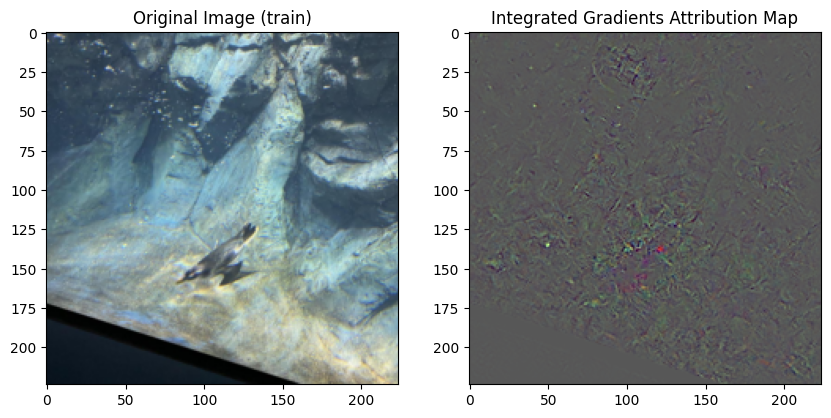

In [ ]:
# ===========================================
# 📦 IMPORTS
# ===========================================
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from captum.attr import IntegratedGradients, visualization
import matplotlib.pyplot as plt
import numpy as np

# ===========================================
# 📁 LOAD DATASET
# ===========================================
data_dir = '/content/drive/MyDrive/archive/aquarium_pretrain'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

image, label = next(iter(dataloader))
class_names = dataset.classes
print(f"Actual label: {class_names[label[0]]}")

# ===========================================
# 🧠 LOAD MODEL
# ===========================================
model = models.resnet50(pretrained=True)
model.eval()

# ===========================================
# ⚙️ INTEGRATED GRADIENTS
# ===========================================
ig = IntegratedGradients(model)
attr, delta = ig.attribute(image, target=label[0], baselines=image * 0, return_convergence_delta=True)

# Convert attribution to numpy
attr = attr.squeeze().detach().numpy().transpose(1, 2, 0)
attr = np.clip((attr - attr.min()) / (attr.max() - attr.min()), 0, 1)

# ===========================================
# 🎨 VISUALIZATION
# ===========================================
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.transpose(image[0].numpy(), (1, 2, 0)))
plt.title(f"Original Image ({class_names[label[0]]})")

plt.subplot(1, 2, 2)
plt.imshow(attr)
plt.title("Integrated Gradients Attribution Map")
plt.show()

In [ ]:
# ===========================================
# 🧩 ATTENTION ROLLOUT FUNCTION
# ===========================================
def attention_rollout(model, image):
    image_h, image_w = 224, 224
    input_image = image.unsqueeze(0).to(model.class_token.device) # Add batch dimension and move to device

    attn_weights_list = [] # List to store attention weights from hooks

    # Define a hook function to capture attention weights
    def hook_fn(module, input, output):
        # output is a tuple (attn_output, attn_output_weights)
        # We need attn_output_weights, which is output[1]
        attn_weights_list.append(output[1])

    # Monkey-patch MultiheadAttention to always return weights
    original_forward_methods = {}
    for blk in model.encoder.layers:
        mha_module = blk.self_attention
        if not hasattr(mha_module, '_orig_forward'): # Check if already patched
            original_forward_methods[mha_module] = mha_module.forward
            def _patched_forward(mha_self, query, key, value, key_padding_mask=None,
                                  attn_mask=None, need_weights=True, average_attn_weights=True,
                                  is_causal=False):
                return original_forward_methods[mha_self](query, key, value, key_padding_mask=key_padding_mask,
                                                         attn_mask=attn_mask, need_weights=True, # Force to True
                                                         average_attn_weights=average_attn_weights, is_causal=is_causal)
            mha_module.forward = _patched_forward.__get__(mha_module, type(mha_module))

    # Register hooks to all self_attention modules in encoder blocks
    hooks = []
    for blk in model.encoder.layers:
        hook = blk.self_attention.register_forward_hook(hook_fn)
        hooks.append(hook)

    # Perform a forward pass to trigger the hooks
    with torch.no_grad():
        _ = model(input_image)

    # Remove the hooks after use
    for hook in hooks:
        hook.remove()

    # Revert monkey-patching
    for blk in model.encoder.layers:
        mha_module = blk.self_attention
        if hasattr(mha_module, '_orig_forward'):
            mha_module.forward = original_forward_methods[mha_module]
            del mha_module._orig_forward

    # Extract patch size from the model's conv_proj layer
    patch_size = model.conv_proj.kernel_size[0]

    # Process captured attention weights for rollout
    num_patches_side = image_h // patch_size
    num_patches = num_patches_side * num_patches_side

    # Initialize identity matrix for rollout, including the CLS token
    result = torch.eye(num_patches + 1).to(input_image.device)

    # Use the collected attn_weights_list directly for rollout calculation
    for attn_weights_layer in attn_weights_list:
        # attn_weights_layer shape: (batch_size, num_heads, seq_len, seq_len)
        # Take mean over heads and remove batch dimension (since batch_size is 1)
        attn = attn_weights_layer.mean(dim=1).squeeze(0) # Shape: (seq_len, seq_len)

        # Add identity to attention matrix to account for residual connections
        attn = attn + torch.eye(attn.size(-1)).to(attn.device)

        # Normalize attention weights to sum to 1 along the last dimension
        attn = attn / attn.sum(dim=-1, keepdim=True)

        # Multiply with previous result for rollout
        result = torch.matmul(attn, result)

    # The attention for the class token (index 0) to all image patches (index 1 onwards).
    mask = result[0, 1:].reshape(num_patches_side, num_patches_side)
    mask = mask / mask.max() # Normalize to [0, 1]
    mask = cv2.resize(mask.cpu().numpy(), (image_h, image_w)) # Upscale to original image size
    return mask

Device: cpu
Using image: /content/drive/MyDrive/archive/aquarium_pretrain/valid/images/IMG_2345_jpeg_jpg.rf.1c32346981ba9d501078eb82f2c63555.jpg


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight en

Detections kept: 4 (score>=0.5)


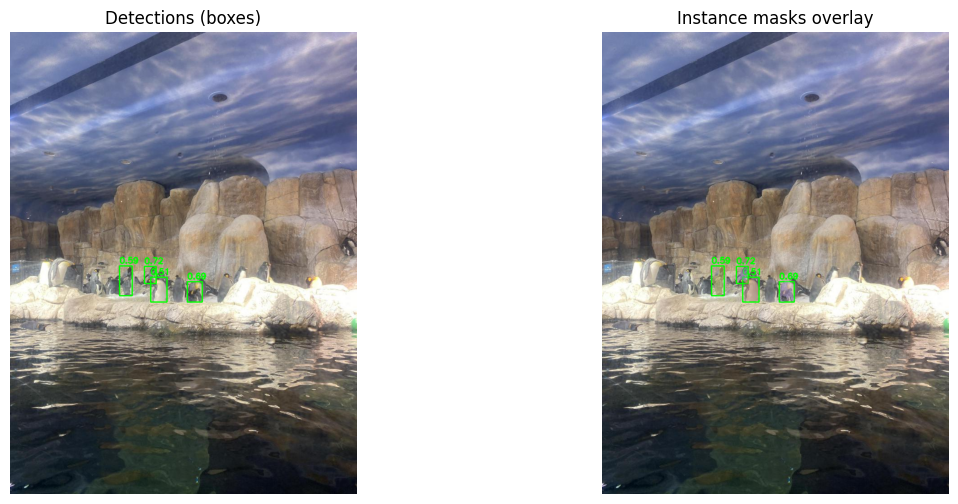

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)
/tmp/ipython-input-1823902768.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colored = plt.cm.get_cmap(cmap)(heatmap)[:, :, :3]


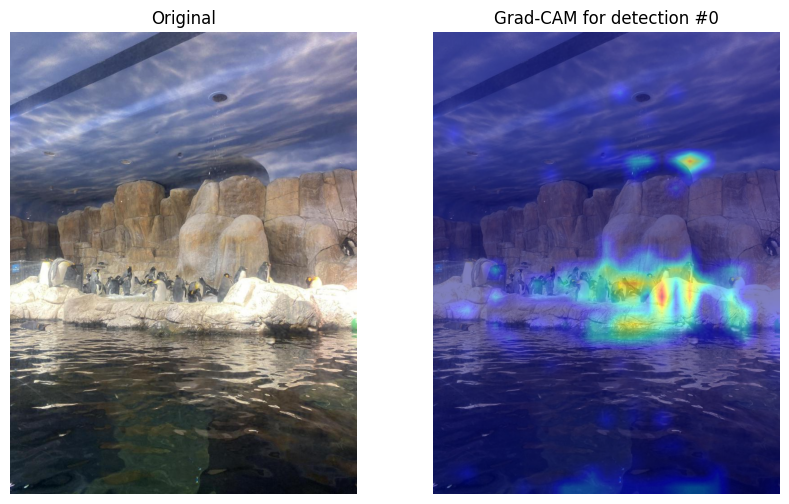

Base matched score: 0.724949300289154


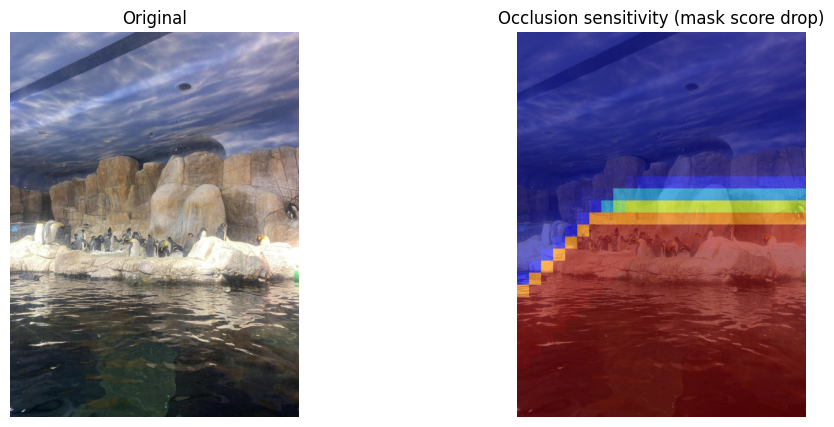

Running RISE masks: 100%|██████████| 50/50 [06:06<00:00,  7.32s/it]


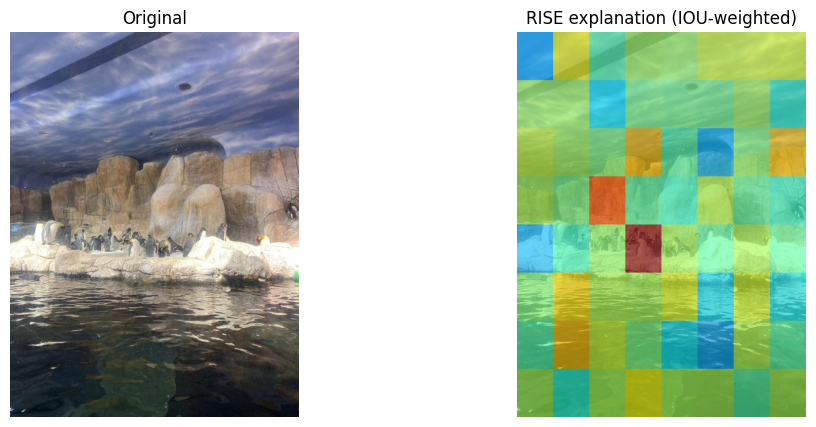

In [ ]:
# XAI for Object Detection & Segmentation (Mask R-CNN)
# Path: /content/drive/MyDrive/archive/aquarium_pretrain
# Run in Colab / local env with GPU if available.

# 0) Install / imports (uncomment install lines in Colab if needed)
# !pip install -q torch torchvision    # (if not already installed)

import os
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random

# -------------------------
# 1) Settings and helpers
# -------------------------
DATA_DIR = "/content/drive/MyDrive/archive/aquarium_pretrain"
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", DEVICE)

# choose one image file from folder (find first image file)
img_files = []
for p in Path(DATA_DIR).rglob("*"):
    if p.suffix.lower() in [".jpg", ".jpeg", ".png", ".bmp"]:
        img_files.append(p)
if len(img_files) == 0:
    raise SystemExit(f"No images found under {DATA_DIR}")
IMG_PATH = str(img_files[0])
print("Using image:", IMG_PATH)

# transforms
preprocess = transforms.Compose([
    transforms.ToTensor(),  # scales to [0,1]
])

# visual helpers
def show_image(ax, img, title=None):
    ax.imshow(img)
    ax.axis('off')
    if title:
        ax.set_title(title)

def overlay_heatmap_on_image(img, heatmap, alpha=0.5, cmap='jet'):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.clip(heatmap, 0, 1)
    colored = plt.cm.get_cmap(cmap)(heatmap)[:, :, :3]
    blended = (1 - alpha) * img + alpha * (colored * 255)
    return blended.astype(np.uint8)

# -------------------------
# 2) Load model
# -------------------------
model = maskrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=True)
model.eval().to(DEVICE)

# -------------------------
# 3) Run model on image
# -------------------------
img_pil = Image.open(IMG_PATH).convert("RGB")
img_tensor = preprocess(img_pil).to(DEVICE)

with torch.no_grad():
    outputs = model([img_tensor])  # list of dicts
out = outputs[0]

boxes = out['boxes'].cpu().numpy()
labels = out['labels'].cpu().numpy()
scores = out['scores'].cpu().numpy()
masks = out['masks'].cpu().numpy()  # (N,1,H,W) masks as probabilities

# filter out low score detections
TH = 0.5
keep = np.where(scores >= TH)[0]
if keep.size == 0:
    print("No detections >= threshold. Lower threshold or inspect image.")
else:
    boxes = boxes[keep]
    labels = labels[keep]
    scores = scores[keep]
    masks = masks[keep]

print(f"Detections kept: {len(boxes)} (score>={TH})")

# Convert to displayable image
img_np = np.array(img_pil)
H, W = img_np.shape[:2]

# -------------------------
# 4) Visualize detections
# -------------------------
def visualize_detections(img_np, boxes, masks, scores, max_dets=5):
    fig, axes = plt.subplots(1, 2, figsize=(14,6))
    # left: original + boxes
    ax = axes[0]
    show_image(ax, img_np.copy(), title="Detections (boxes)")
    for i, box in enumerate(boxes[:max_dets]):
        x1,y1,x2,y2 = box.astype(int)
        cv2.rectangle(img_np, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(img_np, f"{scores[i]:.2f}", (x1, max(y1-6,0)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    show_image(axes[0], img_np)
    # right: instance masks overlay
    overlay = img_np.copy()
    for i, m in enumerate(masks[:max_dets]):
        mask = (m[0] > 0.5).astype(np.uint8)
        color = np.random.randint(50, 255, size=3)
        overlay[mask==1] = (0.6*overlay[mask==1] + 0.4*color).astype(np.uint8)
    show_image(axes[1], overlay, title="Instance masks overlay")
    plt.show()

visualize_detections(img_np.copy(), boxes, masks, scores)

# -----------------------------------------
# 5) Grad-CAM for a detected instance (box)
# -----------------------------------------
# We'll compute Grad-CAM on the backbone feature map (the output of layer4 conv block inside the ResNet backbone).
# For torchvision Mask R-CNN, backbone is model.backbone.body (a ResNet) with layers: layer1..layer4.

def grad_cam_for_detection(model, input_tensor, detection_index=0, target_label=None):
    """
    Computes Grad-CAM for a specific detected instance (detection_index among filtered detections).
    We take the score for the detection (the classification score) as the target scalar.
    Returns heatmap (H,W) normalized [0,1].
    """
    model.eval()
    # hooks storage
    fmap = {}
    grads = {}

    # Choose target module: backbone.body.layer4 (ResNet last conv block output)
    target_module = model.backbone.body.layer4

    def forward_hook(module, inp, outp):
        fmap['val'] = outp.detach()

    def backward_hook(module, grad_in, grad_out):
        grads['val'] = grad_out[0].detach()

    # register hooks on last layer
    fh = target_module.register_forward_hook(forward_hook)
    bh = target_module.register_backward_hook(backward_hook)

    # Forward pass to get outputs with gradient tracking
    # input_tensor is already (C, H, W) when passed from the call site
    # We need to wrap it in a list as the model expects a list of images
    model.zero_grad()
    outputs = model([input_tensor.to(DEVICE)])[0]

    # pick the detection score to backprop from: the highest-scoring detection by default
    if len(outputs['scores']) == 0:
        print("No detections to explain.")
        fh.remove(); bh.remove()
        return None

    # map detection_index to model's detection ordering (assume we used same threshold as before)
    idx = detection_index
    if target_label is not None:
        # find first detection with given label
        idxs = [i for i,l in enumerate(outputs['labels']) if int(l)==int(target_label)]
        if len(idxs)==0:
            idx = 0
        else:
            idx = idxs[0]
    # target score scalar
    score = outputs['scores'][idx]
    # Backpropagate from this score
    score.backward(retain_graph=True)

    # retrieve fmap and grads
    activation = fmap['val'].squeeze(0)   # (C, Hf, Wf)
    grad = grads['val'].squeeze(0)       # (C, Hf, Wf)
    # channel-wise weights: global-average pooling of gradients
    weights = torch.mean(grad.view(grad.shape[0], -1), dim=1)  # (C,)
    cam = torch.zeros(activation.shape[1:], dtype=torch.float32).to(DEVICE)  # (Hf,Wf)
    for i, w in enumerate(weights):
        cam += w * activation[i]
    cam = cam.cpu().numpy()
    # relu & normalize
    cam = np.maximum(cam, 0)
    cam = cam - cam.min()
    if cam.max() != 0:
        cam = cam / cam.max()
    # Resize to original image size
    cam = cv2.resize(cam, (W, H))
    fh.remove(); bh.remove()
    return cam

# compute Grad-CAM for first detection (if any)
if len(boxes) > 0:
    cam = grad_cam_for_detection(model, img_tensor.cpu(), detection_index=0)
    if cam is not None:
        blended = overlay_heatmap_on_image(img_np, cam, alpha=0.5)
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1); plt.imshow(img_np); plt.title("Original")
        plt.axis('off')
        plt.subplot(1,2,2); plt.imshow(blended); plt.title("Grad-CAM for detection #0")
        plt.axis('off')
        plt.show()

# -----------------------------------------
# 6) Occlusion Sensitivity for a selected instance mask
# -----------------------------------------
def occlusion_sensitivity_for_mask(model, img_tensor, instance_mask, box=None, patch_size=32, stride=16):
    """
    For a binary instance_mask (H,W) and original image tensor (C,H,W),
    occlude patches and measure drop in mask-score for that instance.
    We compute an importance heatmap same size as image.
    """
    model.eval()
    C,H,W = img_tensor.shape
    # compute baseline score for the instance by re-running model and matching mask IoU with prediction masks
    with torch.no_grad():
        orig_out = model([img_tensor.to(DEVICE)])[0]
    # find best-matching predicted mask index by IoU
    preds_masks = orig_out['masks'].cpu().numpy()  # (N,1,H,W)
    ious = []
    for pm in preds_masks:
        pm_bin = (pm[0] > 0.5).astype(np.uint8)
        inter = np.logical_and(pm_bin, instance_mask).sum()
        union = np.logical_or(pm_bin, instance_mask).sum() + 1e-8
        ious.append(inter/union)
    if len(ious)==0:
        base_score = 0.0
    else:
        best_idx = int(np.argmax(ious))
        base_score = float(orig_out['scores'][best_idx].cpu().item())

    heatmap = np.zeros((H,W), dtype=np.float32)

    # --- Adjusted parameters for faster execution on CPU ---
    # Increased patch_size and stride to reduce the number of occlusion iterations.
    # This will result in a coarser explanation but will run faster.
    adjusted_patch_size = 64
    adjusted_stride = 32
    # --------------------------------------------------------

    # slide window occlusion
    for y in range(0, H, adjusted_stride):
        for x in range(0, W, adjusted_stride):
            occluded = img_tensor.clone()
            y2 = min(y+adjusted_patch_size, H)
            x2 = min(x+adjusted_patch_size, W)
            occluded[:, y:y2, x:x2] = 0.0  # black patch
            with torch.no_grad():
                out = model([occluded.to(DEVICE)])[0]
            # compute new best score for the instance via IoU with instance_mask
            preds_masks2 = out['masks'].cpu().numpy()
            ious2 = []
            for pm2 in preds_masks2:
                pm_bin2 = (pm2[0] > 0.5).astype(np.uint8)
                inter2 = np.logical_and(pm_bin2, instance_mask).sum()
                union2 = np.logical_or(pm_bin2, instance_mask).sum() + 1e-8
                ious2.append(inter2/union2)
            if len(ious2)==0:
                new_score = 0.0
            else:
                best2 = int(np.argmax(ious2))
                new_score = float(out['scores'][best2].cpu().item())
            drop = base_score - new_score
            heatmap[y:y2, x:x2] = max(heatmap[y:y2, x:x2].max(), drop)

    # normalize
    heatmap = heatmap - heatmap.min()
    if heatmap.max() != 0:
        heatmap = heatmap / heatmap.max()
    return heatmap, base_score

# pick first mask to explain (if exists)
if len(masks) > 0:
    instance_mask = (masks[0][0] > 0.5).astype(np.uint8)
    occ_heatmap, base_score = occlusion_sensitivity_for_mask(model, img_tensor.clone(), instance_mask, patch_size=32, stride=16)
    print("Base matched score:", base_score)
    blended = overlay_heatmap_on_image(np.array(img_pil), occ_heatmap, alpha=0.6)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1); plt.imshow(np.array(img_pil)); plt.title("Original")
    plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(blended); plt.title("Occlusion sensitivity (mask score drop)")
    plt.axis('off')
    plt.show()

# -----------------------------------------
# 7) RISE-style perturbation for detection / mask explanations
# -----------------------------------------
def generate_rise_masks(n_masks, H, W, s=8, p=0.5):
    """
    Simple RISE mask generator (grid then upsample).
    """
    cell_h = int(np.ceil(H / s))
    cell_w = int(np.ceil(W / s))
    masks = np.zeros((n_masks, H, W), dtype=np.float32)
    for i in range(n_masks):
        grid = (np.random.rand(s, s) < p).astype(np.float32)
        mask = cv2.resize(grid, (W, H), interpolation=cv2.INTER_NEAREST)
        masks[i] = mask
    return masks

def rise_explain_detection(model, img_tensor, target_mask, n_masks=300, s=8, p=0.5):
    """
    For a target_mask (binary HxW), apply random masks to image and score each masked image
    by IoU between predicted masks and target_mask. Aggregate weighted sum to get importance map.
    """
    H, W = target_mask.shape
    # --- Adjusted parameter for faster execution on CPU ---
    # Reduced the number of masks for RISE to speed up computation.
    # This will result in a coarser explanation but will run faster.
    adjusted_n_masks = 50
    # --------------------------------------------------------

    masks = generate_rise_masks(adjusted_n_masks, H, W, s=s, p=p)
    scores = np.zeros(adjusted_n_masks, dtype=np.float32)
    # precompute original bounding for normalization
    for i in tqdm(range(adjusted_n_masks), desc="Running RISE masks"):
        mask = masks[i]
        # apply mask to image (per-channel)
        img_np = np.array(img_pil).astype(np.float32) / 255.0
        masked = img_np * mask[:, :, None]
        masked_tensor = torch.from_numpy(masked.transpose(2,0,1)).float()
        with torch.no_grad():
            out = model([masked_tensor.to(DEVICE)])[0]
        # compute best IoU between predicted masks and target_mask
        preds_masks = out['masks'].cpu().numpy()
        best_iou = 0.0
        for pm in preds_masks:
            pm_bin = (pm[0] > 0.5).astype(np.uint8)
            inter = np.logical_and(pm_bin, target_mask).sum()
            union = np.logical_or(pm_bin, target_mask).sum() + 1e-8
            best_iou = max(best_iou, inter/union)
        scores[i] = best_iou
    # aggregate masks weighted by scores
    weighted = np.tensordot(scores, masks, axes=(0,0))  # (H,W)
    if weighted.max() != 0:
        weighted = weighted / weighted.max()
    return weighted

# run RISE on first detected instance
if len(masks) > 0:
    target_mask = (masks[0][0] > 0.5).astype(np.uint8)
    rise_map = rise_explain_detection(model, img_tensor.clone(), target_mask, n_masks=200, s=8, p=0.5)
    blended = overlay_heatmap_on_image(np.array(img_pil), rise_map, alpha=0.6)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1); plt.imshow(np.array(img_pil)); plt.title("Original")
    plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(blended); plt.title("RISE explanation (IOU-weighted)")
    plt.axis('off')
    plt.show()

# -------------------------
# Done. You can loop through images or detections as needed.
# -------------------------

Boosting

In [ ]:
import torch
import numpy as np
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# ==============================================
# LOAD DATASET
# ==============================================
data_dir = "/content/drive/MyDrive/archive/aquarium_pretrain"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

class_names = dataset.classes
num_classes = len(class_names)

# ==============================================
# LOAD PRETRAINED RESNET50 (FEATURE EXTRACTOR)
# ==============================================
model = resnet50(weights=ResNet50_Weights.DEFAULT)
model.eval()

# Remove last classification layer → use features only
feature_extractor = torch.nn.Sequential(*list(model.children())[:-1])

# ==============================================
# EXTRACT FEATURES
# ==============================================
features = []
labels = []

with torch.no_grad():
    for imgs, lbls in dataloader:
        feat = feature_extractor(imgs)
        feat = feat.view(feat.size(0), -1)   # flatten
        features.append(feat.numpy())
        labels.append(lbls.numpy())

features = np.vstack(features)
labels = np.hstack(labels)

print("Feature shape:", features.shape)
print("Labels shape:", labels.shape)

# ==============================================
# TRAIN-TEST SPLIT
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# ==============================================
# XGBOOST BOOSTING CLASSIFIER
# ==============================================
model_xgb = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=num_classes,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

model_xgb.fit(X_train, y_train)

# ==============================================
# PREDICT & ACCURACY
# ==============================================
y_pred = model_xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Boosting Accuracy:", round(acc * 100, 2), "%")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


Feature shape: (638, 2048)
Labels shape: (638,)
Boosting Accuracy: 64.06 %


In [ ]:
Stacking (Stacked Generalization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# ------------------ Load Dataset ------------------
data_dir = "/content/drive/MyDrive/archive/aquarium_pretrain"

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir, target_size=(128,128), batch_size=32,
    class_mode="categorical", subset="training", shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir, target_size=(128,128), batch_size=32,
    class_mode="categorical", subset="validation", shuffle=True
)

# Convert dataset to arrays
X_train, y_train = next(train_gen)
for _ in range(len(train_gen)-1):
    X_b, y_b = next(train_gen)
    X_train = np.append(X_train, X_b, axis=0)
    y_train = np.append(y_train, y_b, axis=0)

X_val, y_val = next(val_gen)
for _ in range(len(val_gen)-1):
    X_b, y_b = next(val_gen)
    X_val = np.append(X_val, X_b, axis=0)
    y_val = np.append(y_val, y_b, axis=0)

y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

# ------------------ CNN Model 1 ------------------
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(train_gen.num_classes, activation='softmax')
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

tf.random.set_seed(42) # Set a random seed for reproducibility
cnn1 = build_cnn()
cnn1.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# ------------------ CNN Model 2 (MobileNetV2) ------------------
base_model = tf.keras.applications.MobileNetV2(
    weights="imagenet", include_top=False, input_shape=(128,128,3)
)
base_model.trainable = False

cnn2 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(train_gen.num_classes, activation="softmax")
])
cnn2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cnn2.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# ------------------ STACKING ------------------
# Level-1 predictions
pred1_train = cnn1.predict(X_train)
pred2_train = cnn2.predict(X_train)

pred1_val = cnn1.predict(X_val)
pred2_val = cnn2.predict(X_val)

# Combine predictions into stacked feature set
stack_train = np.hstack([pred1_train, pred2_train])
stack_val = np.hstack([pred1_val, pred2_val])

# ------------------ Meta Model ------------------
meta = LogisticRegression(max_iter=200)
meta.fit(stack_train, y_train_labels)

# Final Prediction
final_pred = meta.predict(stack_val)

# Accuracy
accuracy = accuracy_score(y_val_labels, final_pred)
print("STACKING MODEL ACCURACY:", accuracy)


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 810ms/step - accuracy: 0.4888 - loss: 1.2598
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 805ms/step - accuracy: 0.6951 - loss: 0.8195
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 802ms/step - accuracy: 0.6951 - loss: 0.7912
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 701ms/step - accuracy: 0.7115 - loss: 0.7223
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 772ms/step - accuracy: 0.7397 - loss: 0.6056
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 345ms/step - accuracy: 0.6138 - loss: 1.0584
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 348ms/step - accuracy: 0.6530 - loss: 0.8613
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.6691 - loss: 0.7946
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 392ms/step - accuracy: 0.7097 - loss: 0.7299
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 347ms/step - accuracy: 0.7326 - loss: 0.6680
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 528ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 390ms/step
4/4 ━━━━━━━━

AdaBoost + GradientBoosting + XGBoost

In [ ]:
!pip install xgboost

# ===== 1. IMPORTS =====
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# ===== 2. LOAD IMAGE DATA =====
train_dir = "/content/drive/MyDrive/archive/aquarium_pretrain"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation'
)

# ===== 3. FLATTEN IMAGES =====
def flatten(data_gen):
    X, y = [], []
    for i in range(len(data_gen)):
        xi, yi = data_gen[i]
        X.append(xi.reshape(xi.shape[0], -1))
        y.append(yi)
    return np.vstack(X), np.vstack(y)

X_train, y_train = flatten(train_data)
X_val, y_val = flatten(val_data)

y_train = y_train.argmax(axis=1)
y_val = y_val.argmax(axis=1)

# ===== 4. SCALE DATA =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ===== 5. TRAIN BOOSTING MODELS =====

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_val)
ada_acc = accuracy_score(y_val, ada_pred)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_val)
gb_acc = accuracy_score(y_val, gb_pred)

# XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    objective="multi:softmax",
    num_class=len(train_data.class_indices)
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)
xgb_acc = accuracy_score(y_val, xgb_pred)

# ===== 6. PRINT ACCURACIES =====
print("AdaBoost Accuracy:", ada_acc)
print("Gradient Boosting Accuracy:", gb_acc)
print("XGBoost Accuracy:", xgb_acc)


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
AdaBoost Accuracy: 0.6984126984126984
Gradient Boosting Accuracy: 0.6746031746031746
XGBoost Accuracy: 0.6904761904761905


Hybrid Ensemble (Bagging + Boosting + Stacking)

In [ ]:
!pip install xgboost

# ===== 1. IMPORTS =====
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===== 2. LOAD DATASET =====
data_path = "/content/drive/MyDrive/archive/aquarium_pretrain"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_path, target_size=(64, 64), batch_size=64,
    class_mode='categorical', subset='training'
)

val_gen = datagen.flow_from_directory(
    data_path, target_size=(64, 64), batch_size=64,
    class_mode='categorical', subset='validation'
)

# ===== 3. FLATTEN FUNCTION =====
def flatten(gen):
    X, y = [], []
    for i in range(len(gen)):
        a, b = gen[i]
        X.append(a.reshape(a.shape[0], -1))
        y.append(b)
    return np.vstack(X), np.vstack(y)

X_train, y_train = flatten(train_gen)
X_val, y_val = flatten(val_gen)

y_train = y_train.argmax(axis=1)
y_val = y_val.argmax(axis=1)

# ===== 4. SCALE =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# ===== 5. ENSEMBLE MODELS =====

# --- Bagging: Random Forest ---
bag_model = RandomForestClassifier(n_estimators=150)

# --- Boosting: XGBoost ---
boost_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    objective="multi:softprob",
    num_class=len(train_gen.class_indices)
)

# --- Stacking Model (Bagging + Boosting) ---
stack_model = StackingClassifier(
    estimators=[
        ('bag', bag_model),
        ('boost', boost_model)
    ],
    final_estimator=LogisticRegression(max_iter=200)
)

# ===== 6. TRAIN MODELS =====
stack_model.fit(X_train, y_train)

# ===== 7. PREDICT =====
stack_pred = stack_model.predict(X_val)
stack_acc = accuracy_score(y_val, stack_pred)

# ===== 8. PRINT ACCURACY =====
print("🔥 Hybrid Ensemble (Bagging + Boosting + Stacking) Accuracy:", stack_acc)


Found 512 images belonging to 3 classes.
Found 126 images belonging to 3 classes.
🔥 Hybrid Ensemble (Bagging + Boosting + Stacking) Accuracy: 0.7063492063492064


Attention-Based XAI for Transformer Model

Classes: ['test', 'train', 'valid']
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


100%|██████████| 330M/330M [00:02<00:00, 117MB/s] 



🔥 Overall Accuracy: 52.34%


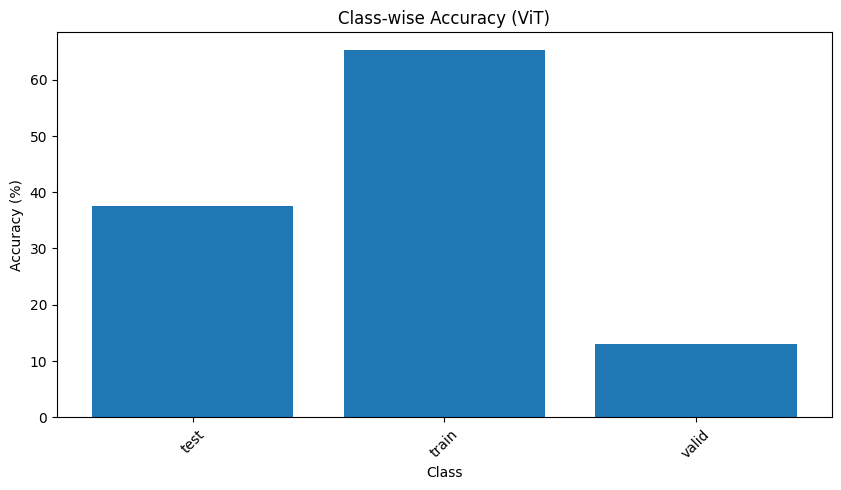

In [ ]:
# ===========================================
# 📦 IMPORTS
# ===========================================
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
from torchvision.models.vision_transformer import vit_b_16, ViT_B_16_Weights
import matplotlib.pyplot as plt
import numpy as np

# ===========================================
# 📁 LOAD DATASET
# ===========================================
data_dir = '/content/drive/MyDrive/archive/aquarium_pretrain'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder(data_dir, transform=transform)
class_names = dataset.classes
print("Classes:", class_names)

# Train–test split (80–20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])

test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

# ===========================================
# 🧠 LOAD PRETRAINED VISION TRANSFORMER
# ===========================================
weights = ViT_B_16_Weights.IMAGENET1K_V1
model = vit_b_16(weights=weights)
model.eval()

# Replace classifier head to match num_classes
num_classes = len(class_names)
model.heads.head = torch.nn.Linear(model.heads.head.in_features, num_classes)

# NOTE: ViT is not trained on your dataset, so accuracy will be low without training.

# ===========================================
# 📊 ACCURACY CALCULATION
# ===========================================
correct = 0
total = 0

# Track class-wise
class_correct = [0] * num_classes
class_total = [0] * num_classes

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        correct += (preds == labels).sum().item()
        total += labels.size(0)

        for l, p in zip(labels, preds):
            class_total[l] += 1
            if l == p:
                class_correct[l] += 1

accuracy = 100 * correct / total
print(f"\n🔥 Overall Accuracy: {accuracy:.2f}%")

# ===========================================
# 🎯 CLASS-WISE ACCURACY GRAPH
# ===========================================
classwise_acc = [100 * (c / t) if t > 0 else 0 for c, t in zip(class_correct, class_total)]

plt.figure(figsize=(10, 5))
plt.bar(class_names, classwise_acc)
plt.title("Class-wise Accuracy (ViT)")
plt.xlabel("Class")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

# ===========================================
# 🖼️ SHOW SAMPLE IMAGE WITH PREDICTION
# ===========================================
img, true_label = dataset[10]   # Random sample
input_img = img.unsqueeze(0)

with torch.no_grad():
    out = model(input_img)
    _, predicted = torch.max(out, 1)

pred_label = class_names[predicted.item()]
true_label = class_names[true_label]

plt.imshow(img.permute(1, 2, 0))
plt.title(f"Predicted: {pred_label} | Actual: {true_label}")
plt.axis("off")
plt.show()
